In [20]:
import geopandas as gpd
import pandas as pd
from geetiles import cmds
import numpy as np
import matplotlib.pyplot as plt
from earthtext.osm import multilabel

kvmerged = multilabel.OSMCodeSets.get('naip')['kvmerged']
len(kvmerged.inverse_codes)

119

In [21]:
mfile = '/opt/data/california-naip-chips/california-naip-chips-100k.parquet'

In [4]:
data = gpd.read_parquet(mfile)

In [6]:
# check tag chip counts is > 100
(np.stack(data['onehot_count'].values)>0).sum(axis=0)

array([  767,   764,   123,  4590,   136,   153,  2776,  1925,   127,
       22959,  3278,   129,  2339,   309,   216, 11799,  1728,  3689,
        2029,   735,  1312, 14047,   183,   183,   305,   305, 53393,
        1269,  5374,  6519,   107, 29933, 18249,   178,   178, 37051,
        1561,   378,   319,  1766,   373,   158,   981,  2630,   174,
        1980, 13827,   877,   483,   146,   223, 13141,  1576,  6975,
         233,   537,  2174,  2510,  1213,   333,   149,  1153, 18187,
         290,  5104,   331,  1134,   143,   165,  2323,   379,  4189,
        3075,   158,  1631,  1276,  1276,   260,   117,   143,   968,
         331,   547,   196,   103,   103,   586,   334,   260,   956,
         390,   291,   152,   327,  1293,   710,   287,   134,   163,
         109,   389,   110,   182,   103,  2420,   373,   114,   713,
         136,   563,   478,   121,   113,  1821,   117,  1730, 22788,
         776, 22071])

In [7]:
data.head()

,onehot_count,onehot_area,onehot_length,string_labels,date,chip_index_x,chip_index_y,cloud_cover_percentage,nodata_percentage,geometry,embeddings,original_chip_id
chip_id,,,,,,,,,,,,
363a8bd1189d2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[highway=*, highway=track, landuse=*, landuse=...",2022-06-07,39,27,0.0,0.0,"POLYGON ((-118.87306 34.96546, -118.87303 34.9...","[-0.15684646, -0.012374564, 0.14199159, 0.0223...",ca_m_3411801_ne_11_060_20220607-39-27
1ff73cff31463,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[landuse=*, landuse=farmland]",2022-06-07,32,24,0.0,0.0,"POLYGON ((-118.88492 34.96943, -118.88489 34.9...","[-0.1360133, 0.01871811, 0.14964038, 0.0063366...",ca_m_3411801_ne_11_060_20220607-32-24
0fa44a50e26f3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[highway=*, highway=track, landuse=*, landuse=...",2022-06-07,17,6,0.0,0.0,"POLYGON ((-118.91073 34.99395, -118.91070 34.9...","[-0.15236035, 0.020283332, 0.15849304, 0.01576...",ca_m_3411801_ne_11_060_20220607-17-6
10164c9de3dbc,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[highway=*, highway=residential, natural=*, na...",2022-06-07,24,10,0.0,0.0,"POLYGON ((-118.89883 34.98860, -118.89879 34.9...","[-0.0994814, 0.021638228, 0.059680425, -0.0212...",ca_m_3411801_ne_11_060_20220607-24-10
107eb5b33ddeb,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[landuse=*, landuse=industrial]",2022-06-07,25,3,0.0,0.0,"POLYGON ((-118.89737 34.99832, -118.89734 34.9...","[-0.13629381, 0.022764312, 0.14250448, 0.00573...",ca_m_3411801_ne_11_060_20220607-25-3


In [8]:
# prepare for geetiles

tmpdata = data[['geometry']].copy()
tmpdata['identifier'] = tmpdata.index
tmpdata.to_file("/tmp/data.geojson", driver='GeoJSON')

## call geetiles to make the split

In [9]:
cmds.split(tiles_file = '/tmp/data.geojson',
                nbands = 80,
                angle = -np.pi/4,
                train_pct = 0.7,
                test_pct = 0.15,
                val_pct = 0.15)

saved to /tmp/data.geojson
all splits saved to /tmp/data_splits.csv


In [10]:
splits = pd.read_csv("/tmp/data_splits.csv").set_index('identifier')
splits.index.name = 'chip_id'
splits.shape

(104138, 1)

In [11]:
data.head()

,onehot_count,onehot_area,onehot_length,string_labels,date,chip_index_x,chip_index_y,cloud_cover_percentage,nodata_percentage,geometry,embeddings,original_chip_id
chip_id,,,,,,,,,,,,
363a8bd1189d2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[highway=*, highway=track, landuse=*, landuse=...",2022-06-07,39,27,0.0,0.0,"POLYGON ((-118.87306 34.96546, -118.87303 34.9...","[-0.15684646, -0.012374564, 0.14199159, 0.0223...",ca_m_3411801_ne_11_060_20220607-39-27
1ff73cff31463,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[landuse=*, landuse=farmland]",2022-06-07,32,24,0.0,0.0,"POLYGON ((-118.88492 34.96943, -118.88489 34.9...","[-0.1360133, 0.01871811, 0.14964038, 0.0063366...",ca_m_3411801_ne_11_060_20220607-32-24
0fa44a50e26f3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[highway=*, highway=track, landuse=*, landuse=...",2022-06-07,17,6,0.0,0.0,"POLYGON ((-118.91073 34.99395, -118.91070 34.9...","[-0.15236035, 0.020283332, 0.15849304, 0.01576...",ca_m_3411801_ne_11_060_20220607-17-6
10164c9de3dbc,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[highway=*, highway=residential, natural=*, na...",2022-06-07,24,10,0.0,0.0,"POLYGON ((-118.89883 34.98860, -118.89879 34.9...","[-0.0994814, 0.021638228, 0.059680425, -0.0212...",ca_m_3411801_ne_11_060_20220607-24-10
107eb5b33ddeb,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[landuse=*, landuse=industrial]",2022-06-07,25,3,0.0,0.0,"POLYGON ((-118.89737 34.99832, -118.89734 34.9...","[-0.13629381, 0.022764312, 0.14250448, 0.00573...",ca_m_3411801_ne_11_060_20220607-25-3


## join and save

In [12]:
sdata = data.join(splits)
sdata.to_parquet(mfile)

In [13]:
sdata.head()

,onehot_count,onehot_area,onehot_length,string_labels,date,chip_index_x,chip_index_y,cloud_cover_percentage,nodata_percentage,geometry,embeddings,original_chip_id,split
chip_id,,,,,,,,,,,,,
363a8bd1189d2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[highway=*, highway=track, landuse=*, landuse=...",2022-06-07,39,27,0.0,0.0,"POLYGON ((-118.87306 34.96546, -118.87303 34.9...","[-0.15684646, -0.012374564, 0.14199159, 0.0223...",ca_m_3411801_ne_11_060_20220607-39-27,train
1ff73cff31463,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[landuse=*, landuse=farmland]",2022-06-07,32,24,0.0,0.0,"POLYGON ((-118.88492 34.96943, -118.88489 34.9...","[-0.1360133, 0.01871811, 0.14964038, 0.0063366...",ca_m_3411801_ne_11_060_20220607-32-24,train
0fa44a50e26f3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[highway=*, highway=track, landuse=*, landuse=...",2022-06-07,17,6,0.0,0.0,"POLYGON ((-118.91073 34.99395, -118.91070 34.9...","[-0.15236035, 0.020283332, 0.15849304, 0.01576...",ca_m_3411801_ne_11_060_20220607-17-6,train
10164c9de3dbc,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[highway=*, highway=residential, natural=*, na...",2022-06-07,24,10,0.0,0.0,"POLYGON ((-118.89883 34.98860, -118.89879 34.9...","[-0.0994814, 0.021638228, 0.059680425, -0.0212...",ca_m_3411801_ne_11_060_20220607-24-10,train
107eb5b33ddeb,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[landuse=*, landuse=industrial]",2022-06-07,25,3,0.0,0.0,"POLYGON ((-118.89737 34.99832, -118.89734 34.9...","[-0.13629381, 0.022764312, 0.14250448, 0.00573...",ca_m_3411801_ne_11_060_20220607-25-3,train


In [14]:
import geoplot as gplt

z = sdata.copy()
z['geometry'] = [i.centroid for i in z.geometry]

Text(0.5, 1.0, 'train - test - val split')

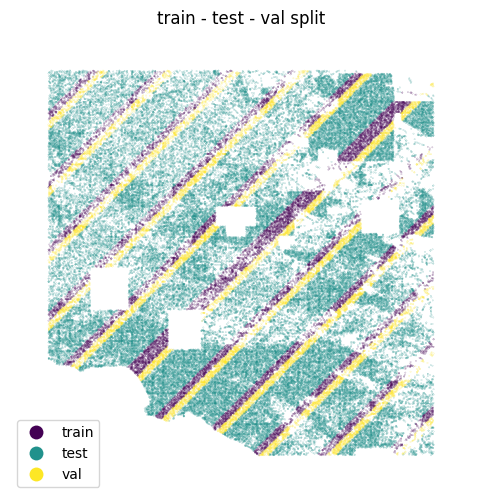

In [15]:
gplt.pointplot(z, hue='split', s=0.1, legend=True, legend_labels=['train', 'test', 'val']);
plt.title(f"train - test - val split")


In [16]:
np.stack(sdata.onehot_count).sum(axis=0)

array([   919,    789,    130,   6986,    156,    155,   4496,   2041,
          138, 458794,  25846,    165,   5984,   2588,    338, 245001,
         5656,  34539,   6076,   2290,   2956, 127355,    185,    185,
          313,    313, 120437,   2079,  20311,   9100,    262,  65311,
        23374,    181,    181,  50142,   2186,    406,    366,   1871,
          476,    254,   2551,   3056,    175,   2240,  14142,   1018,
          497,    163,    236,  18505,   2000,  12247,    912,    546,
         2262,   2660,   2560,    383,    162,   2762,  21148,    424,
         5221,    370,   1258,    143,    171,   2825,    394,   4667,
         3512,    167,   1829,   1891,   1891,    266,    117,    149,
         4230,   3452,    577,    201,    106,    106,    727,    445,
          282,   1911,    536,    478,    218,    679,   1996,   1076,
          411,    183,    185,    141,    495,    118,    213,    164,
         2688,    419,    116,    732,    164,    618,    495,    144,
      

In [ ]:
mul